# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn style directly
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [5]:
# TODO: Aggregate data by year to create a 124-year time series
aggregate_data = df.groupby('Year').agg(['mean'])
# Now rename columns to keep the original names
aggregate_data.columns = [col[0] for col in aggregate_data.columns]  # Flatten column names
variables = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)','Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']
print(aggregate_data[variables].describe())


       Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count                       124.000000               124.000000   
mean                         14.499538               350.028626   
std                           0.009960                 0.456535   
min                          14.474559               348.642249   
25%                          14.492782               349.691692   
50%                          14.499496               350.022334   
75%                          14.504872               350.367023   
max                          14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748                       8.893453  
25%             149.207437                       8.978851  
50%             149.918062          

## 2. Univariate Analysis

Analyze each climate variable independently.

Global Average Temperature Statistics:
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64


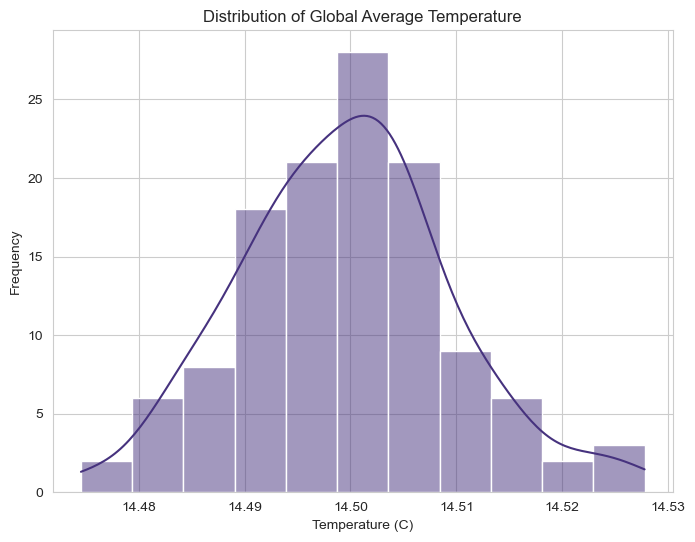

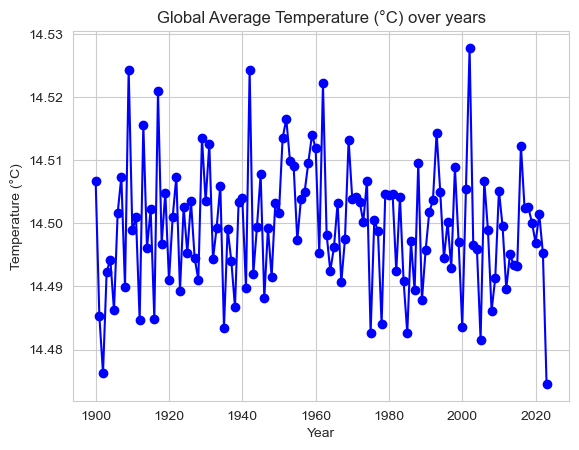

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1909                        14.524320               349.477657   
1942                        14.524255               350.000929   
2002                        14.527762               349.865402   
2023                        14.474559               351.003294   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1909           149.091689                       9.020469  
1942           149.584292                       9.034496  
2002           149.515011                       8.905268  
2023           148.355918                       8.984517  


Text(0.5, 1.0, 'Temperature Boxplot')

In [6]:
## TODO: Perform univariate analysis for each climate variable
## Include descriptive statistics and appropriate visualizations

# Analyze Global Average Temperature (°C) 
summary = aggregate_data['Global Average Temperature (°C)'].describe()
print("Global Average Temperature Statistics:")
print(summary)

# Histogram of Global Average Temperature
plt.figure(figsize=(8, 6))
sns.histplot(aggregate_data['Global Average Temperature (°C)'], kde=True)
plt.title('Distribution of Global Average Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

# Plotting Global Average Temperature (°C)
plt.plot(aggregate_data.index, aggregate_data['Global Average Temperature (°C)'],marker='o', color='b', linestyle='-', label='Temperature')
plt.title('Global Average Temperature (°C) over years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Global Average Temperature (°C)'].quantile(0.25)
Q3 = aggregate_data['Global Average Temperature (°C)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Global Average Temperature (°C)'] < lower_bound) | (aggregate_data['Global Average Temperature (°C)'] > upper_bound)]

# Display the outliers
print(outliers)

# Boxplot to visualize spread and detect outliers
plt.figure(figsize=(10, 6))

# Boxplot for Temp
sns.boxplot(x= aggregate_data['Global Average Temperature (°C)'] ,color='b')
plt.title('Temperature Boxplot')




2. CO2 Concentration (ppm)

CO2 Concentration Statistics:
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64


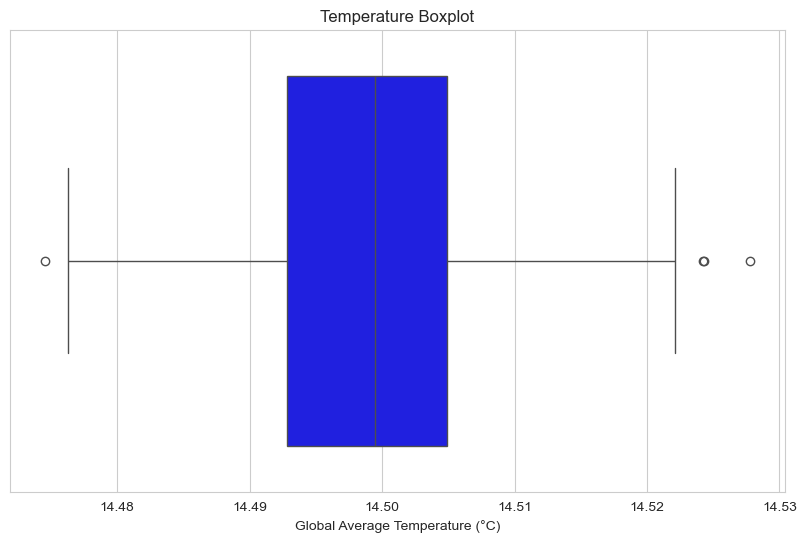

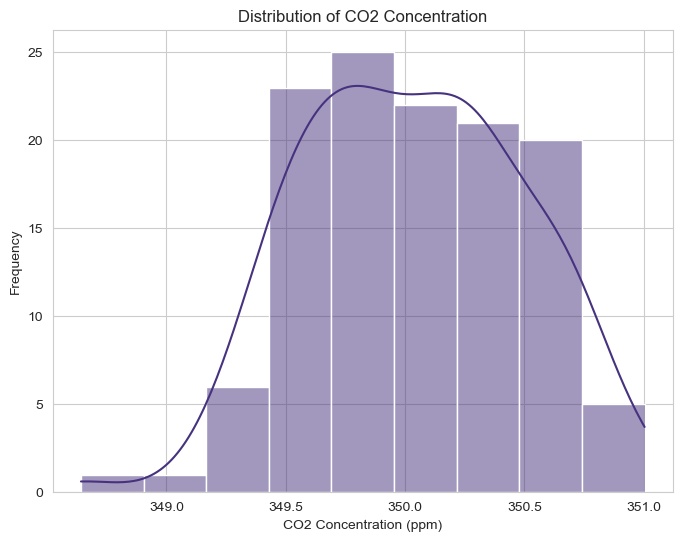

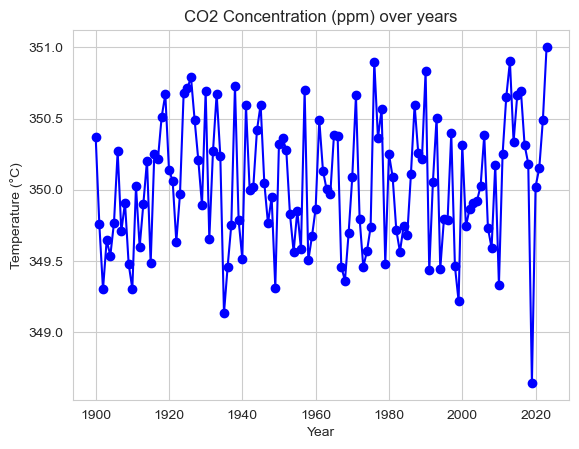

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
2019                        14.500105               348.642249   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
2019           151.020415                        9.01469  


Text(0.5, 1.0, 'CO2 Concentration (ppm)')

In [7]:
# Analyze CO2 Concentration (ppm)
summary = aggregate_data['CO2 Concentration (ppm)'].describe()
print("CO2 Concentration Statistics:")
print(summary)

# Histogram of CO2 Concentration
plt.figure(figsize=(8, 6))
sns.histplot(aggregate_data['CO2 Concentration (ppm)'], kde=True)
plt.title('Distribution of CO2 Concentration')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Frequency')
plt.show()

# Plotting 
plt.plot(aggregate_data.index, aggregate_data['CO2 Concentration (ppm)'],marker='o', color='b', linestyle='-', label='Temperature')
plt.title('CO2 Concentration (ppm) over years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['CO2 Concentration (ppm)'].quantile(0.25)
Q3 = aggregate_data['CO2 Concentration (ppm)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['CO2 Concentration (ppm)'] < lower_bound) | (aggregate_data['CO2 Concentration (ppm)'] > upper_bound)]

# Display the outliers
print(outliers)

# Boxplot to visualize spread and detect outliers
plt.figure(figsize=(10, 6))

# Boxplot for Temp
sns.boxplot(x= aggregate_data['CO2 Concentration (ppm)'] ,color='b')
plt.title('CO2 Concentration (ppm)')



3. Sea Level Rise (mm)

Sea Level Rise Statistics:
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


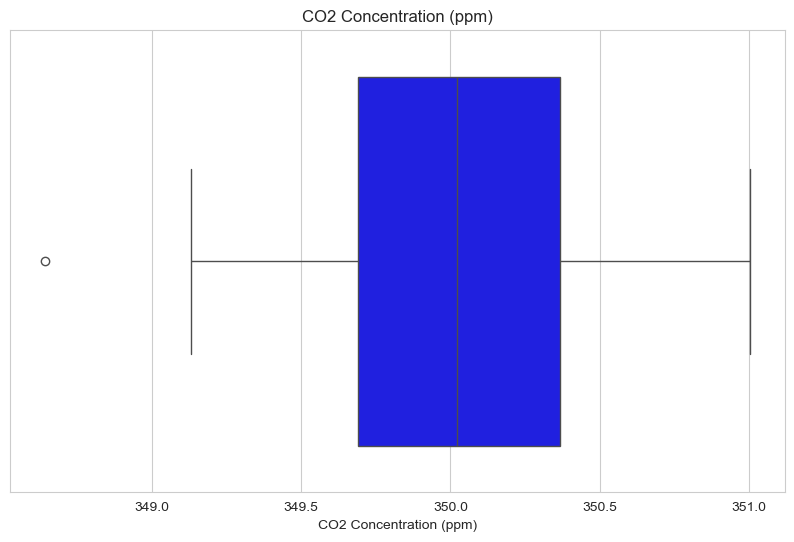

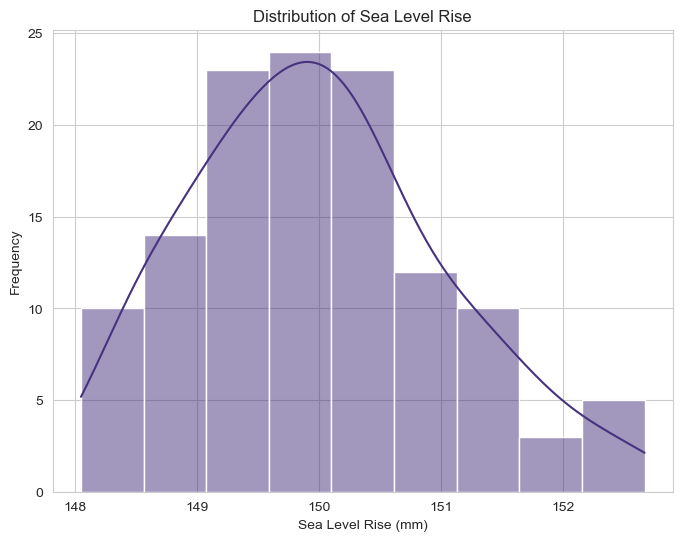

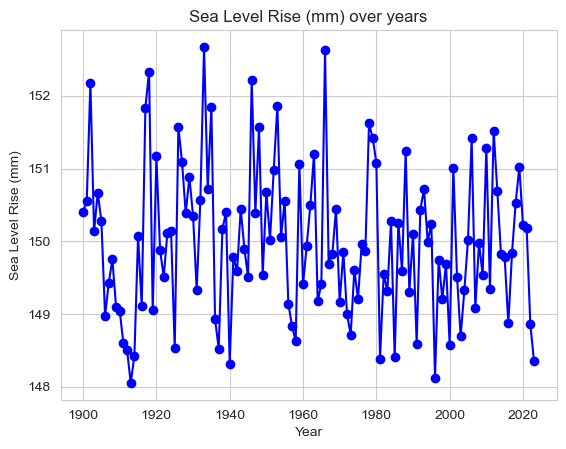

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1933                        14.499317               350.672371   
1966                        14.503253               350.377790   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1933           152.671944                       9.052711  
1966           152.627338                       8.979304  


In [8]:

# Analyze Sea Level Rise (mm) 
summary = aggregate_data['Sea Level Rise (mm)'].describe()
print("Sea Level Rise Statistics:")
print(summary)

# Histogram of Sea Level Rise
plt.figure(figsize=(8, 6))
sns.histplot(aggregate_data['Sea Level Rise (mm)'], kde=True)
plt.title('Distribution of Sea Level Rise')
plt.xlabel('Sea Level Rise (mm)')
plt.ylabel('Frequency')
plt.show()

# Plotting 
plt.plot(aggregate_data.index, aggregate_data['Sea Level Rise (mm)'],marker='o', color='b', linestyle='-', label='Sea Level Rise (mm)')
plt.title('Sea Level Rise (mm) over years')
plt.xlabel('Year')
plt.ylabel('Sea Level Rise (mm)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Sea Level Rise (mm)'].quantile(0.25)
Q3 = aggregate_data['Sea Level Rise (mm)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Sea Level Rise (mm)'] < lower_bound) | (aggregate_data['Sea Level Rise (mm)'] > upper_bound)]

# Display the outliers
print(outliers)



In [9]:

# Boxplot for Temp
plt.subplot(1, 2, 1)
sns.boxplot(x=aggregate_data['Sea Level Rise (mm)'], color='b')
plt.title('Sea Level Rise')


Text(0.5, 1.0, 'Sea Level Rise')

 4. Arctic Ice Area (million km²)

Arctic Ice Area Statistics:
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


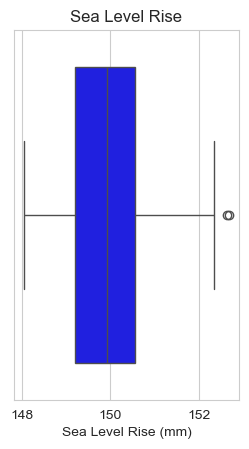

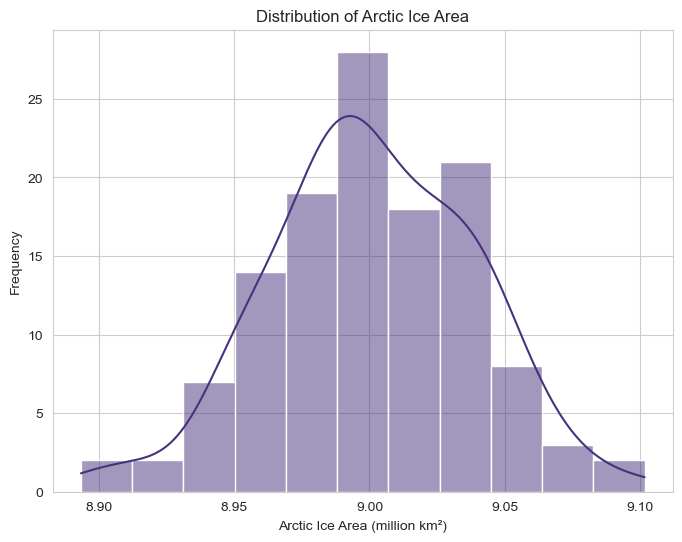

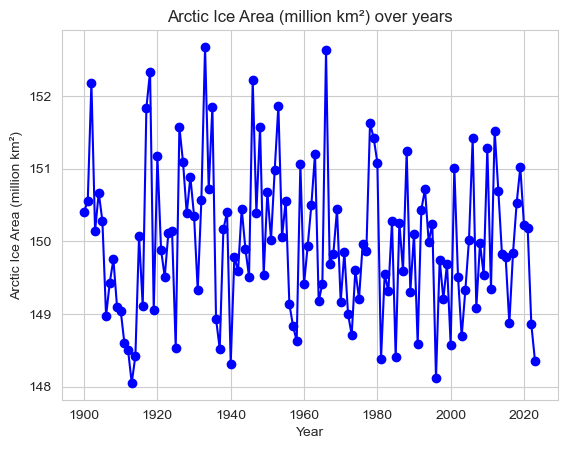

      Global Average Temperature (°C)  CO2 Concentration (ppm)  \
Year                                                             
1981                        14.504589               350.091559   

      Sea Level Rise (mm)  Arctic Ice Area (million km²)  
Year                                                      
1981           148.376618                       8.893453  


In [10]:

# Analyze Global Average Temperature (°C) 
summary = aggregate_data['Arctic Ice Area (million km²)'].describe()
print("Arctic Ice Area Statistics:")
print(summary)

# Histogram of Arctic Ice Area
plt.figure(figsize=(8, 6))
sns.histplot(aggregate_data['Arctic Ice Area (million km²)'], kde=True)
plt.title('Distribution of Arctic Ice Area')
plt.xlabel('Arctic Ice Area (million km²)')
plt.ylabel('Frequency')
plt.show()



# Plotting 
plt.plot(aggregate_data.index, aggregate_data['Sea Level Rise (mm)'],marker='o', color='b', linestyle='-', label='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area (million km²) over years')
plt.xlabel('Year')
plt.ylabel('Arctic Ice Area (million km²)')
plt.grid(True)
plt.show()


# Calculate the first and third quartiles (Q1 and Q3)
Q1 = aggregate_data['Arctic Ice Area (million km²)'].quantile(0.25)
Q3 = aggregate_data['Arctic Ice Area (million km²)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to find outliers (values outside the bounds)
outliers = aggregate_data[(aggregate_data['Arctic Ice Area (million km²)'] < lower_bound) | (aggregate_data['Arctic Ice Area (million km²)'] > upper_bound)]

# Display the outliers
print(outliers)




## 3. Bivariate Analysis

In Bivariate analysis, we analyze all pairs of variables for analysis.

In Bivariate analysis, we created plots as :

. Line plots

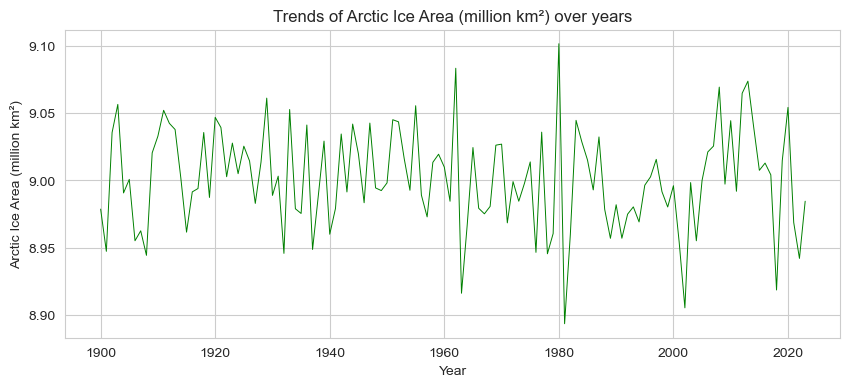

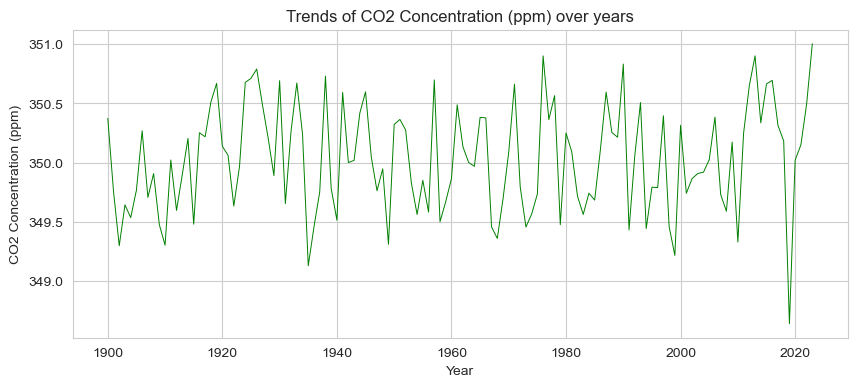

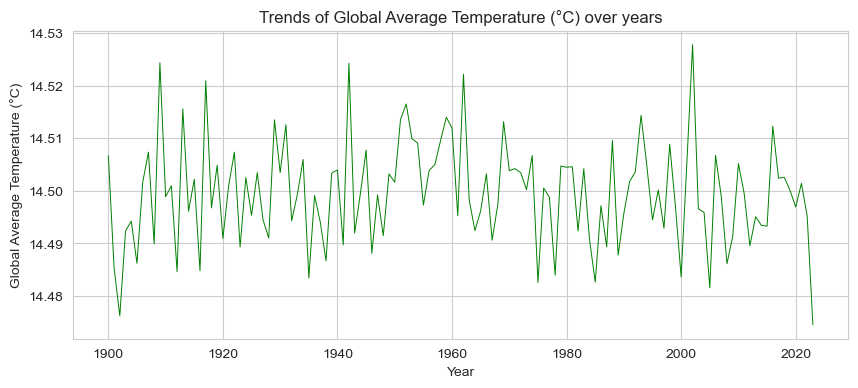

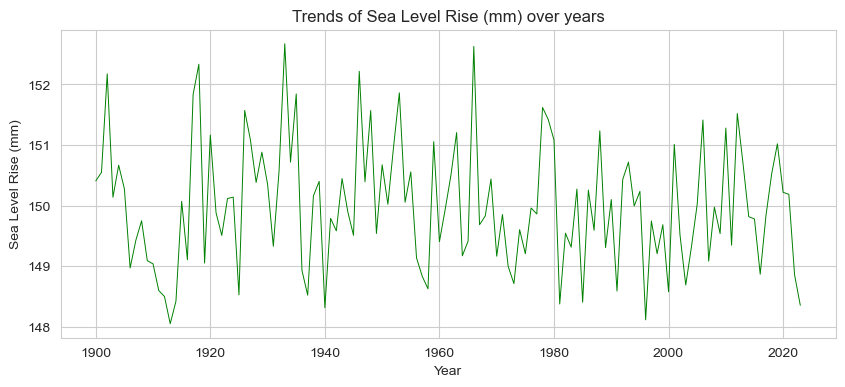

In [11]:
# Visualizations for Line plots
def bivariate_analysis_lineplot(df, variables):
    for variable in variables:
        plt.figure(figsize=(10, 4))
        
        plt.plot(df['Year'], df[variable], color='green', linewidth=0.7)
        plt.title(f"Trends of {variable} over years")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()
        
bivariate_analysis_lineplot(df_aggregated, analysis_columns)

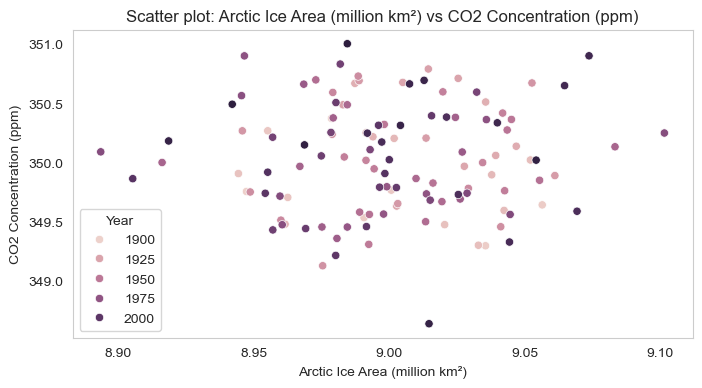

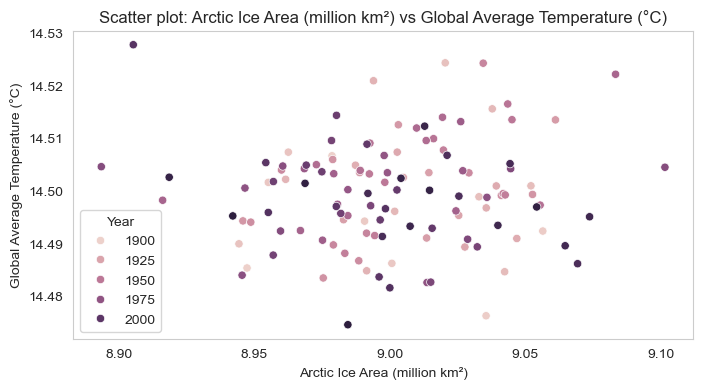

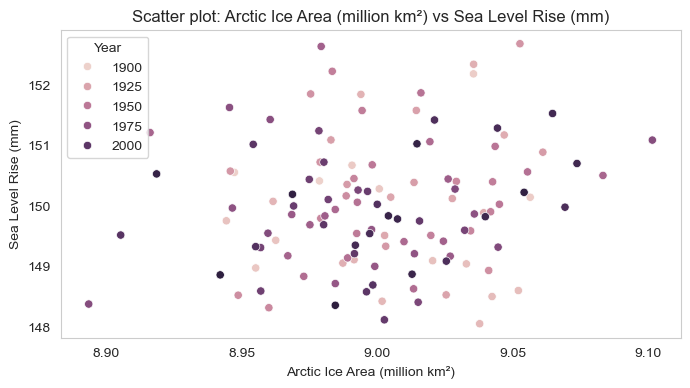

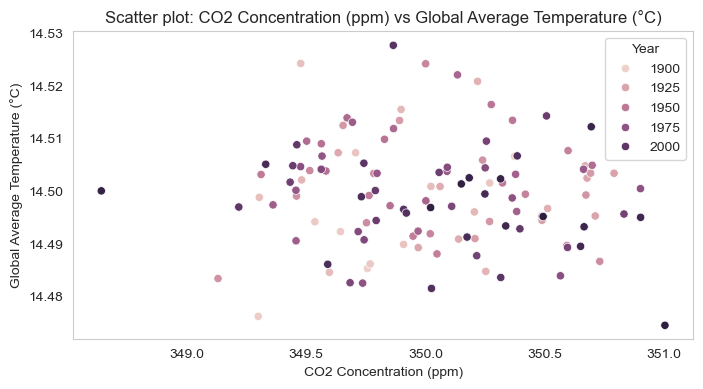

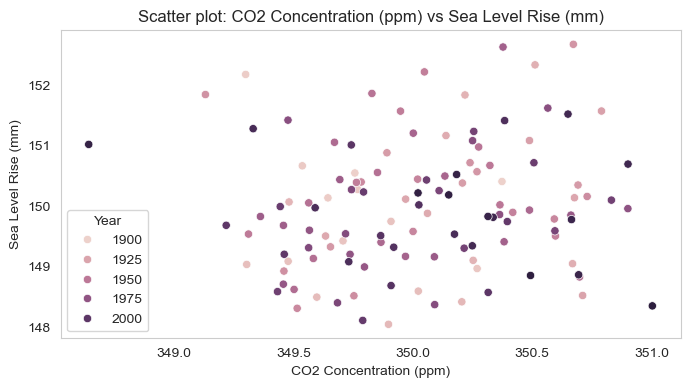

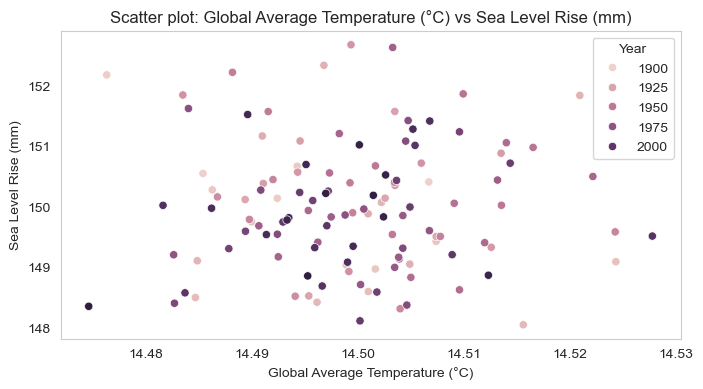

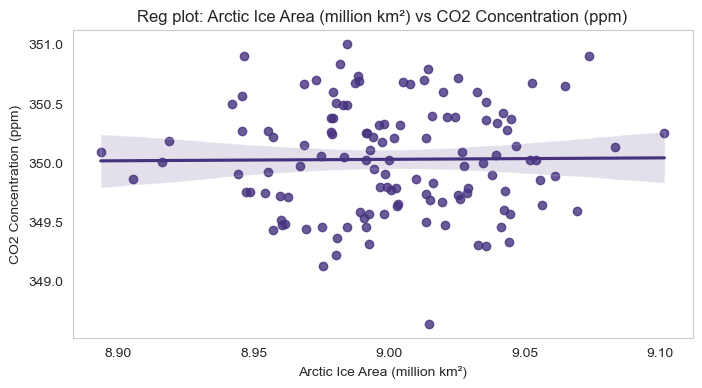

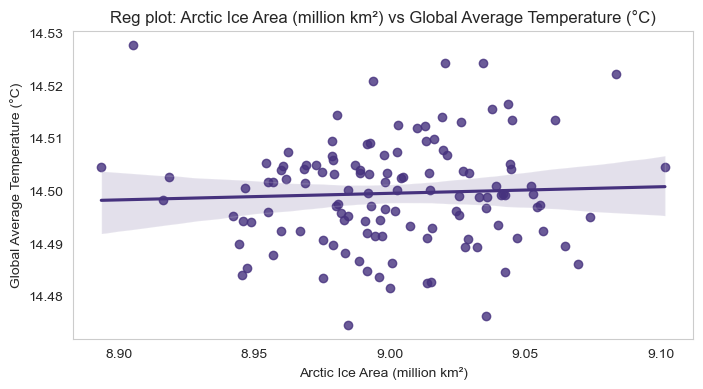

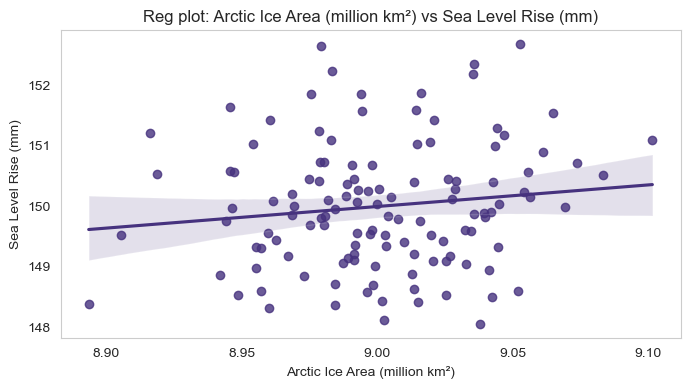

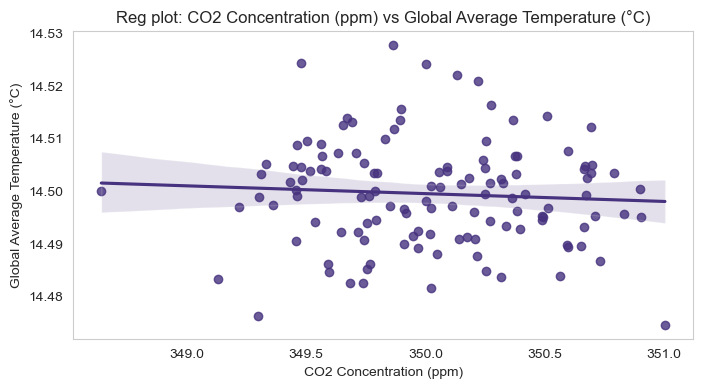

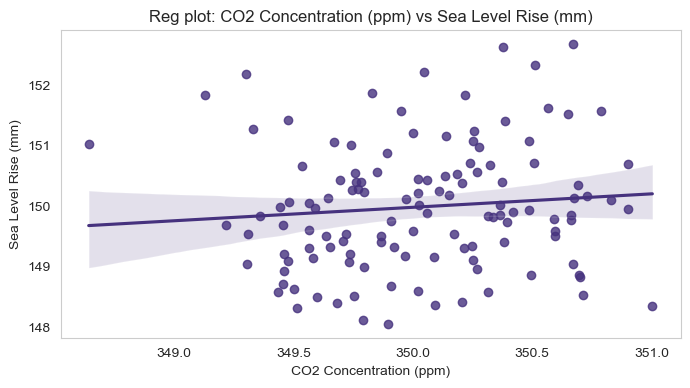

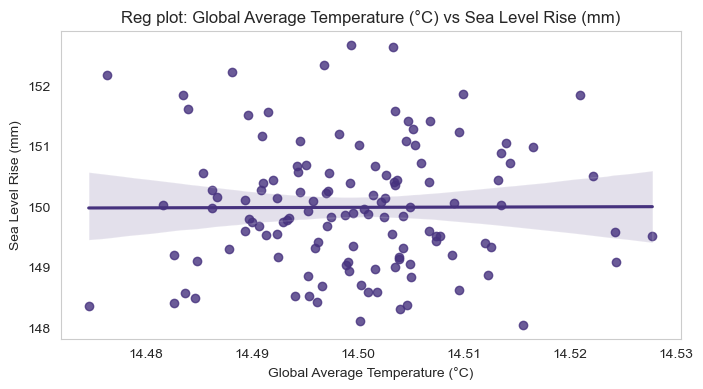

In [12]:
# For scatter Plots

def bivariate_analysis2(df, variables):
    
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=variables[i], y=variables[j], data=df, hue='Year')
            plt.title(f"Scatter plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.regplot(x=variables[i], y=variables[j], data=df)
            plt.title(f"Reg plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

bivariate_analysis2(df_aggregated, analysis_columns)

Correlation Coefficients:

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)            

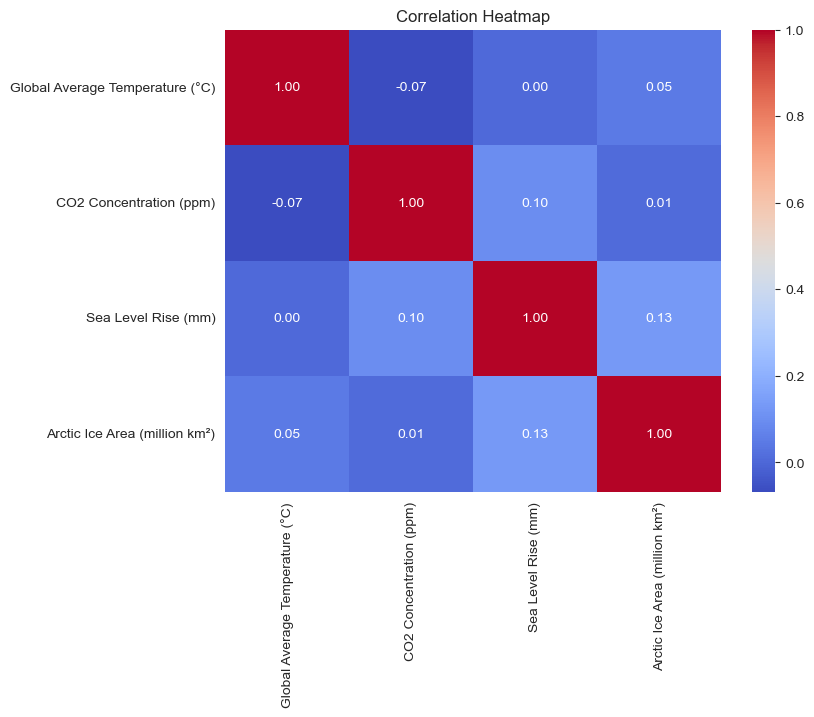

Pair plot for all variable relationships


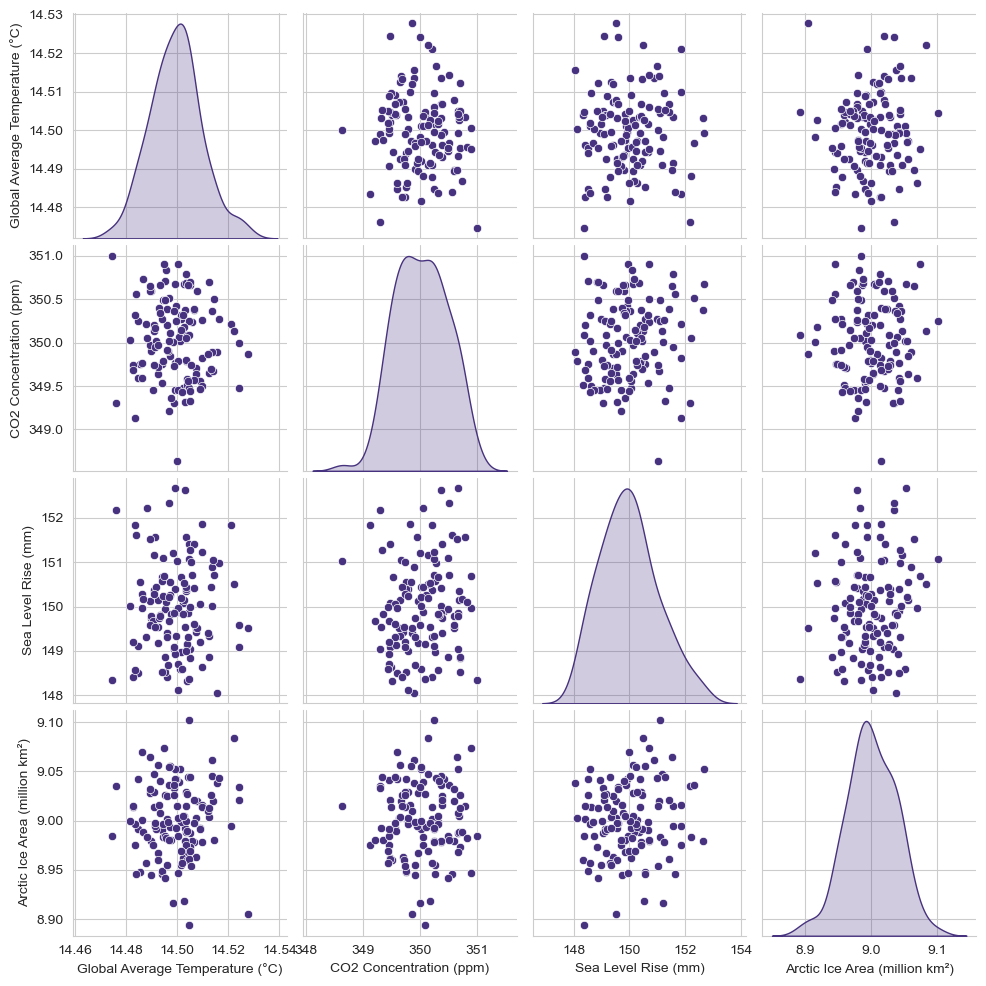

In [13]:
# HeatMap for Bivariate


df_heatmap = df_aggregated.drop(columns=['Year'], errors="ignore")

# Correlation coefficients
correlation_matrix = df_heatmap.corr()
print("Correlation Coefficients:\n")
print(correlation_matrix)


# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print('Pair plot for all variable relationships')
# Pair plot for all variable relationships
sns.pairplot(df_heatmap, diag_kind='kde')
plt.show()

## 5. Conclusions and Insights

1. Univariate analysis

    a. Overview of Global Temperature Trends
The dataset represents the global average temperature spanning over a century (1900s–2020s). With 124 recorded values, the mean temperature is 14.50°C, with a narrow standard deviation of 0.00996°C, indicating low short-term variability.

    b. CO₂ Concentration and Atmospheric Trends
    The mean CO₂ concentration is 350.03 ppm, with values ranging from 348.64 ppm to 351.00 ppm. A low standard deviation of 0.4565 ppm suggests a gradual increase rather than sharp fluctuations in CO₂ levels. This could indicate a steady accumulation of greenhouse gases in the atmosphere, possibly contributing to long-term warming trends.
    
    c. Sea Level Rise Patterns
    The dataset shows an average sea level rise of 149.99 mm, with values between 148.05 mm and 152.67 mm. A moderate standard deviation of 1.03 mm suggests a gradual upward trend, likely linked to global warming and melting ice caps.

    d. Arctic Ice Area Reduction
    The mean Arctic ice area is 9.00 million km², with a range of 8.89 million km² to 9.10 million km². A standard deviation of 0.0375 million km² indicates moderate fluctuations but an overall decreasing trend. The reduction in Arctic ice is a strong indicator of climate change, with potential consequences such as rising sea levels and ecosystem disruptions.


4. Multivariate Analysis
    The 3D scatter plots indicate a correlation between rising CO₂ concentrations, increasing global average temperatures, and environmental changes. Specifically:

CO₂ vs. Temperature vs. Arctic Ice Area: Higher CO₂ levels (348.5 to 350.5 ppm) coincide with a slight temperature increase (14.48°C to 14.53°C) and a reduction in Arctic ice area (9.10 to 8.90 units), suggesting warming contributes to ice loss.

CO₂ vs. Temperature vs. Sea Level: Rising CO₂ (up to 351.0 ppm) and temperatures correlate with a sea level increase (148 to 153 units), likely due to thermal expansion and ice melt.

These trends align with the hypothesis that increased CO₂ emissions drive global warming, impacting polar regions and sea levels. However, the limited dataset and unspecified units warrant further analysis to confirm causality and quantify long-term effects.


# TODO: Write your conclusions here

## Insights From Bivariate Analysis

The analysis shows no clear link between CO₂ levels and Arctic ice area, temperature, or sea level rise. While Arctic ice seems to decrease slightly as temperature rises, the trend is weak. Sea level rise and Arctic ice area appear to be influenced by different factors. Similarly, CO₂ levels don’t strongly correlate with temperature or sea level rise, suggesting other elements affect these changes. The relationship between temperature and sea level rise is also complex, with no clear pattern emerging from the data.